### 2. How do interest rates affect the housing market in Ontario?

In [64]:
#How do interest rates (Covid) effect the housing market in Ontario?
#Interest rates (Jan 2018 to Feb 2023) against percentage change Ontario H
#Correlation of percent change composite price for ontario and interest rates

# Imports
# Read CSV's into Df's
# Filter DF's to appropriate Time Interval [2018-01-01 - 2023-02-01]
# Calculate percentage change 
# Append new pct change column to each df 
# Plot pct change for INT and HPI

# Import the required libraries and dependencies
import pandas as pd
import numpy as np
import hvplot.pandas
from pathlib import Path
from bokeh.models.formatters import NumeralTickFormatter
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import seaborn as sns

In [26]:
# Read In CSV's
ontario_df = pd.read_csv(Path("Resources/ONTARIO.csv"))
ontario_regions_df = pd.read_csv(Path("Resources/ontario_regions.csv"))
bankofcanada_df = pd.read_csv(Path("Resources/bankofcanada_noheader.csv"))

In [27]:
bankofcanada_df.head()

,Date,V122530
0,Mar-23,4.75
1,Feb-23,4.75
2,Jan-23,4.50
3,Dec-22,4.50
4,Nov-22,4.00


In [28]:
ontario_df.head()

,Date,Composite_HPI_SA,Single_Family_HPI_SA,One_Storey_HPI_SA,Two_Storey_HPI_SA,Townhouse_HPI_SA,Apartment_HPI_SA,Composite_Benchmark_SA,Single_Family_Benchmark_SA,One_Storey_Benchmark_SA,Two_Storey_Benchmark_SA,Townhouse_Benchmark_SA,Apartment_Benchmark_SA
0,Jan 2005,100.0,100.0,100.0,100.0,100.0,100.0,219800.0,229800.0,202500.0,246800.0,169100.0,157600.0
1,Feb 2005,101.2,101.3,100.5,101.6,100.7,102.3,222500.0,232800.0,203500.0,250800.0,170200.0,161300.0
2,Mar 2005,102.5,102.7,100.8,103.5,101.5,104.9,225400.0,236100.0,204100.0,255500.0,171600.0,165300.0
3,Apr 2005,104.3,104.7,102.2,105.6,102.3,106.9,229300.0,240500.0,207000.0,260500.0,173000.0,168500.0
4,May 2005,106.0,106.5,103.5,107.6,103.0,109.4,233000.0,244700.0,209500.0,265500.0,174200.0,172400.0


In [29]:
# Convert date column to datetime format
bankofcanada_df['Date'] = pd.to_datetime(bankofcanada_df['Date'], format='%b-%y')

# format the date column to yyyy-mm
bankofcanada_df['Date'] = bankofcanada_df['Date'].dt.strftime('%Y-%m')

# Convert date column to datetime format
ontario_df['Date'] = pd.to_datetime(ontario_df['Date'], format='%b %Y')

# Format date as YYYY-MM
ontario_df['Date'] = ontario_df['Date'].dt.strftime('%Y-%m')

# Set date column as index for Interest Rate and HPI DataFrames 
bankofcanada_df.set_index('Date', inplace=True)
ontario_df.set_index('Date', inplace=True)

In [30]:
ontario_df.head()

,Composite_HPI_SA,Single_Family_HPI_SA,One_Storey_HPI_SA,Two_Storey_HPI_SA,Townhouse_HPI_SA,Apartment_HPI_SA,Composite_Benchmark_SA,Single_Family_Benchmark_SA,One_Storey_Benchmark_SA,Two_Storey_Benchmark_SA,Townhouse_Benchmark_SA,Apartment_Benchmark_SA
Date,,,,,,,,,,,,
2005-01,100.0,100.0,100.0,100.0,100.0,100.0,219800.0,229800.0,202500.0,246800.0,169100.0,157600.0
2005-02,101.2,101.3,100.5,101.6,100.7,102.3,222500.0,232800.0,203500.0,250800.0,170200.0,161300.0
2005-03,102.5,102.7,100.8,103.5,101.5,104.9,225400.0,236100.0,204100.0,255500.0,171600.0,165300.0
2005-04,104.3,104.7,102.2,105.6,102.3,106.9,229300.0,240500.0,207000.0,260500.0,173000.0,168500.0
2005-05,106.0,106.5,103.5,107.6,103.0,109.4,233000.0,244700.0,209500.0,265500.0,174200.0,172400.0


In [31]:
bankofcanada_df.head()

,V122530
Date,
2023-03,4.75
2023-02,4.75
2023-01,4.50
2022-12,4.50
2022-11,4.00


In [32]:
# Filter Time Period For Interest Rates [2018-01-01 - 2023-02-01]

start_date = '2018-01' 
end_date = '2023-02'
filtered_bankofcanada_df = bankofcanada_df.sort_values(by='Date').loc[start_date:end_date]
filtered_bankofcanada_df.head()

# Calculate pct change for HPI column and add column to filtered_bankofcanada_df 
filtered_bankofcanada_df ['int_pct_change'] = filtered_bankofcanada_df['V122530'].pct_change()

In [33]:
filtered_bankofcanada_df.head()

,V122530,int_pct_change
Date,,
2018-01,1.5,NaN
2018-02,1.5,0.0
2018-03,1.5,0.0
2018-04,1.5,0.0
2018-05,1.5,0.0


In [34]:
# Filter Time Period For HPI [2018-01-01 - 2023-02-01]
start_date = '2018-01' 
end_date = '2023-02'

filtered_ontario_df = ontario_df.loc[start_date:end_date].copy()
filtered_ontario_df.loc[:, 'hpi_pct_change'] = filtered_ontario_df['Composite_HPI_SA'].pct_change()

In [35]:
filtered_ontario_df.head()

,Composite_HPI_SA,Single_Family_HPI_SA,One_Storey_HPI_SA,Two_Storey_HPI_SA,Townhouse_HPI_SA,Apartment_HPI_SA,Composite_Benchmark_SA,Single_Family_Benchmark_SA,One_Storey_Benchmark_SA,Two_Storey_Benchmark_SA,Townhouse_Benchmark_SA,Apartment_Benchmark_SA,hpi_pct_change
Date,,,,,,,,,,,,,
2018-01,275.5,286.7,253.1,295.4,263.1,277.7,605500.0,658900.0,512600.0,729000.0,444900.0,437600.0,NaN
2018-02,273.6,284.7,253.2,293.1,261.3,278.4,601400.0,654200.0,512800.0,723400.0,441800.0,438700.0,-0.006897
2018-03,272.8,283.6,253.3,292.5,262.7,279.9,599600.0,651800.0,513000.0,721900.0,444300.0,441100.0,-0.002924
2018-04,272.8,283.3,254.0,291.9,262.6,281.9,599700.0,651000.0,514300.0,720500.0,444100.0,444300.0,0.000000
2018-05,273.4,284.0,254.1,292.6,262.4,283.4,600900.0,652700.0,514500.0,722200.0,443700.0,446600.0,0.002199


In [105]:
# Create line plots for HPI percent change
hpi_percent_change_plot = filtered_ontario_df.hvplot.line(
    x='Date', 
    y='hpi_pct_change', 
    xlabel='Date', 
    ylabel='% Change', 
    title='HPI Percent Change',
    #ylim=(-0.1, 0.1),
    line_color='blue',
    rot=90,
).opts(
    fontsize={
        'title': 20, 
        'labels': 14, 
        'xticks': 5, 
        'yticks': 10,
    }
)

In [106]:
# Create line plots for interest rates
int_plot = filtered_bankofcanada_df.hvplot.line(
    x='Date', 
    y='V122530', 
    xlabel='Date', 
    ylabel='Interest Rate', 
    title='Interest Rate',
    #ylim=(-0.05, 0.05),
    line_color='red',
    rot=90,
).opts(
    fontsize={
        'title': 20, 
        'labels': 14, 
        'xticks': 5, 
        'yticks': 10,
    }
)

In [107]:
# Show both line plots
hpi_percent_change_and_int_plot = hpi_percent_change_plot + int_plot
hpi_percent_change_and_int_plot

:Layout
   .Curve.I  :Curve   [Date]   (hpi_pct_change)
   .Curve.II :Curve   [Date]   (V122530)

In [86]:
#Merge percent change of the HPI with the interest rate
merged_data = pd.merge(filtered_ontario_df['hpi_pct_change'], filtered_bankofcanada_df['V122530'], left_index=True, right_index=True)
merged_data

,hpi_pct_change,V122530
Date,,
2018-01,NaN,1.50
2018-02,-0.006897,1.50
2018-03,-0.002924,1.50
2018-04,0.000000,1.50
2018-05,0.002199,1.50
...,...,...
2022-10,-0.015565,3.50
2022-11,-0.016054,4.00
2022-12,-0.018047,4.50


In [88]:
#Find correlation
correlation = merged_data.corr()
correlation

,hpi_pct_change,V122530
hpi_pct_change,1.000000,-0.720608
V122530,-0.720608,1.000000


<AxesSubplot:>

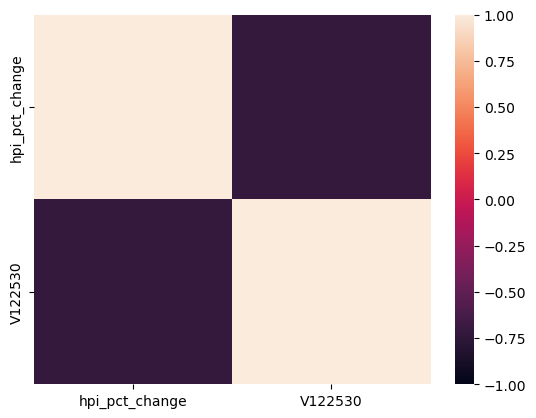

In [89]:
#Show heatmap of correlations
vmin = -1 
vmax = 1
sns.heatmap(correlation, vmin=vmin, vmax=vmax)